In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [48]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,1:]) 
  
# Normalizing the Data -(0,1) araliginda
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df 
pca = PCA(n_components = 4) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4'] 
  
X_principal.head()

,P1,P2,P3,P4
0,-0.658023,-0.540614,-0.137124,-0.142170
1,-0.229299,0.771156,-0.068079,0.265957
2,0.271080,-0.019468,0.697910,-0.282131
3,-0.605548,-0.169231,0.408568,0.187539
4,-0.690101,-0.388292,-0.010651,-0.359201


In [8]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [24]:
X_principal

,P1,P2,P3,P4
0,-0.352177,-0.762746,0.093162,0.103772
1,-0.614656,0.559386,-0.003445,-0.157921
2,0.295047,0.318760,-0.050884,0.750134
3,-0.549045,0.102431,0.421821,0.333209
4,-0.413388,-0.672365,-0.165638,0.278349
...,...,...,...,...
8945,0.362634,-0.198026,0.104178,-0.414410
8946,0.303847,-0.215203,-0.024292,-0.369189
8947,0.233525,-0.251609,0.154205,-0.380611
8948,-0.356981,-0.063686,0.300309,-0.241714


In [11]:
# df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
# df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

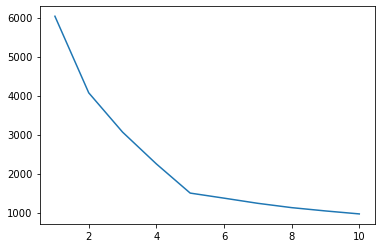

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= None)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [45]:
kmeans = KMeans( n_clusters = 4, init = 'k-means++')
kmeans.fit(X_principal)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X_principal)
df['label']=clusters

[[-0.44131342  0.56393957 -0.13674257 -0.16033639]
 [ 0.56495143  0.0120148  -0.05657223  0.00680968]
 [-0.39842361 -0.44323468 -0.24052324  0.15797664]
 [-0.23129506 -0.09074281  0.64153157 -0.04361664]]


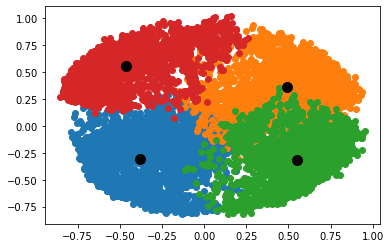

In [46]:
plt.scatter(X_principal['P1'][df.label == 0 ], X_principal['P2'][df.label == 0 ])
plt.scatter(X_principal['P1'][df.label == 1 ], X_principal['P2'][df.label == 1 ]) 
plt.scatter(X_principal['P1'][df.label == 2 ], X_principal['P2'][df.label == 2 ]) 
plt.scatter(X_principal['P1'][df.label == 3 ], X_principal['P2'][df.label == 3 ])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "k")
plt.show()